# Making a classifier that can predict/classify sentiment of image 

In [4]:
### Importing packages

In [1]:
# import some functionality
from datetime import datetime

import os
import pip
os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install panda')
os.system('python -m pip install nilearn')
os.system('python -m pip install sklearn')
os.system('python -m pip install pickle')
os.system('python -m pip install atlasreader')
os.system('python -m pip install seaborn')

#import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=2a0f1cbc4891ed2dea4e165bbf0a09ad79eb60523eca2cf80b34299cbed8f2ae
  Stored in directory: /home/ucloud/.cache/pip/wheels/6c/5a/a9/a28c87238ddcc61701224f538bedccc21c9e2b8bc6fa8fca0e
Successfully built panda
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2360 sha256=c9e52dfc4aa566316cacdb2e626bf29481a4ba044ad97f65f053fa5c17f165ff
  Stored in directory: /home/ucloud/.cache/pip/wheels/36/49/c9/2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


  Created wheel for atlasreader: filename=atlasreader-0.1.2-py3-none-any.whl size=12046471 sha256=709a4c66b896b0403b7af93ccb85e4a8d2878f9c44b0c5b28a403a887f0e0393
  Stored in directory: /home/ucloud/.cache/pip/wheels/87/0b/8b/83185241c4f15a023385b9f8e0821838b1ee56ffa733bdad6c
Successfully built atlasreader
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.1
    Uninstalling Pillow-8.3.1:
      Successfully uninstalled Pillow-8.3.1


In [7]:
###loading in the first level models for all participants (made in FaceWord_analysis markdown)

In [1]:
import pickle

# Getting the first level models from tutorial 13:
f = open('485667/BIDS/FL_models/FL_models_fixed.pkl', 'rb')
models1, models_run_imgs1, models_events1, models_confounds1 = pickle.load(f)
f.close()


In [ ]:
### Figuring out what is in the models_events variable

In [2]:
#Number of participants
print(len(models_events1))
N=models_events1[1][1].shape[0]

print(models_confounds1[1][3].shape[0])
print(models1[1].t_r)

text = "Number of images: %d, number of trials: %d" % (models_confounds1[1][3].shape[0], N)
print(text)

19
610
1
Number of images: 610, number of trials: 120


In [ ]:
## Creating new design matrices with a column per experimental trial.

In [3]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np

N_par=len(models_events1) # Number of participants
lsa_dm= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events1[i])):
        #N=number of events
        N=models_events1[i][ii].shape[0]
        #Number of images per session (determined by number of rows in confounding variable)
        N_img=models_confounds1[i][ii].shape[0]
        #duration of scan
        dur=N_img*models1[i].t_r # duration of run
        # Vector of timepoints duratoin and number of images 
        t_fmri = np.linspace(0, dur,N_img,endpoint=False)
        # We have to create a dataframe with onsets/durations/trial_types
        # No need for modulation!
        trials = pd.DataFrame(models_events1[i][ii], columns=['onset'])
        trials.loc[:, 'duration'] = 0.7
        trials.loc[:, 'trial_type'] = ['t_'+str(iii).zfill(3) + '_' + models_events1[i][ii]['trial_type'][iii-1]  for iii in range(1, N+1)]

        # lsa_dm = least squares all design matrix
        lsa_dm[i].append(make_first_level_design_matrix(
            frame_times=t_fmri,  # we defined this earlier 
            events=trials,
            add_regs=models_confounds1[i][ii], #Add the confounds from fmriprep
            hrf_model='glover',
            drift_model='cosine'  
        ))

In [ ]:
## Plot design matrices

IndexError: list index out of range

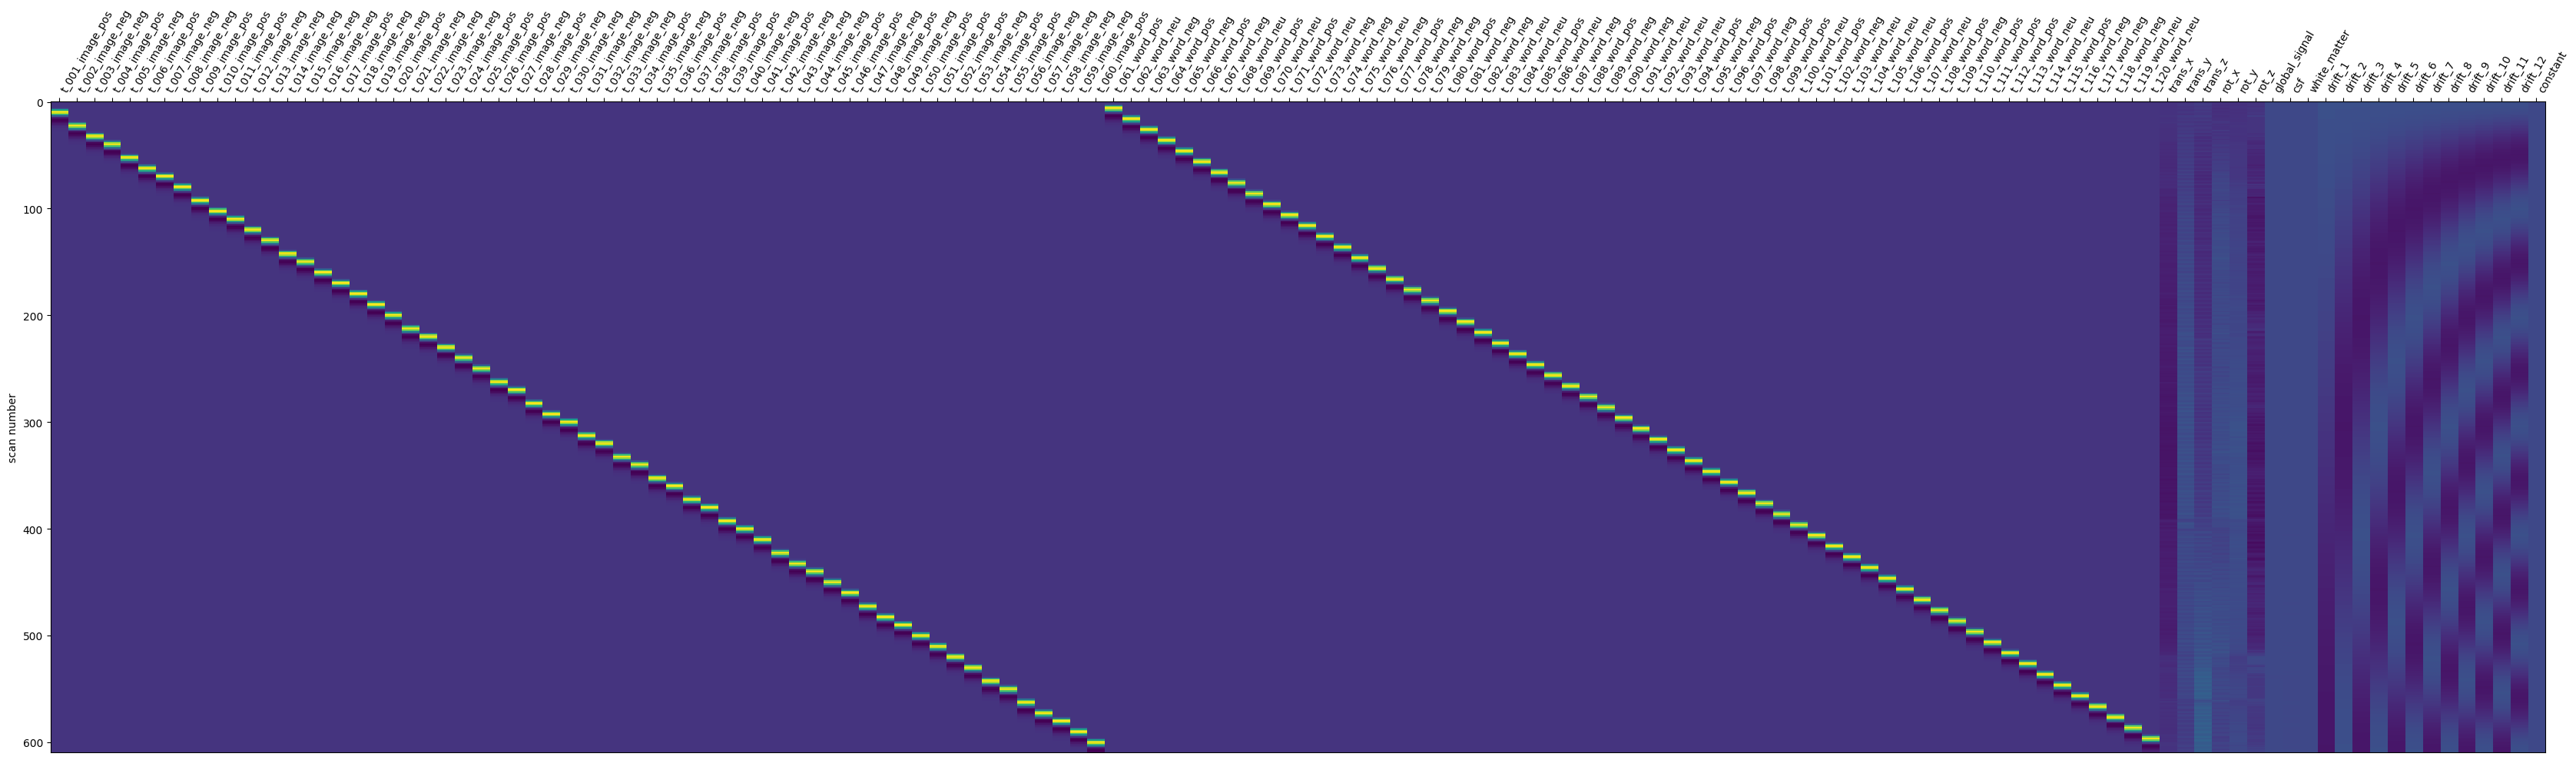

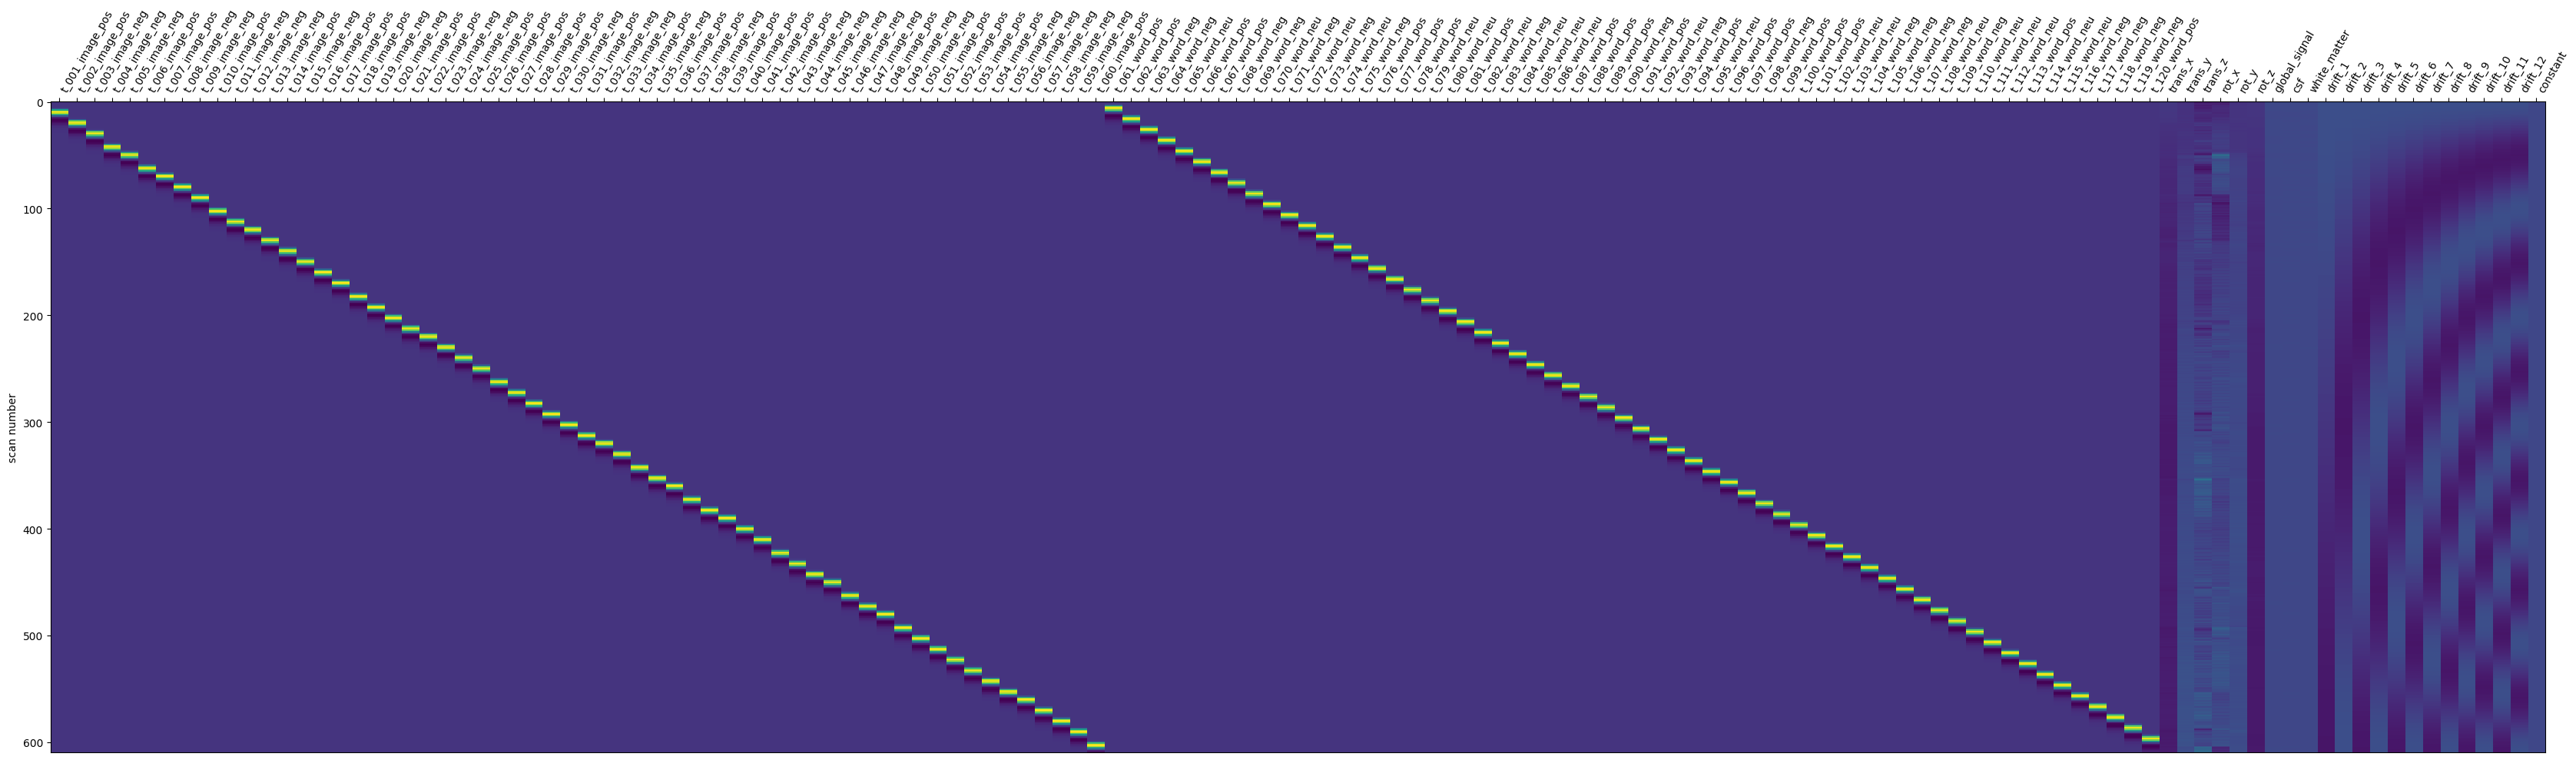

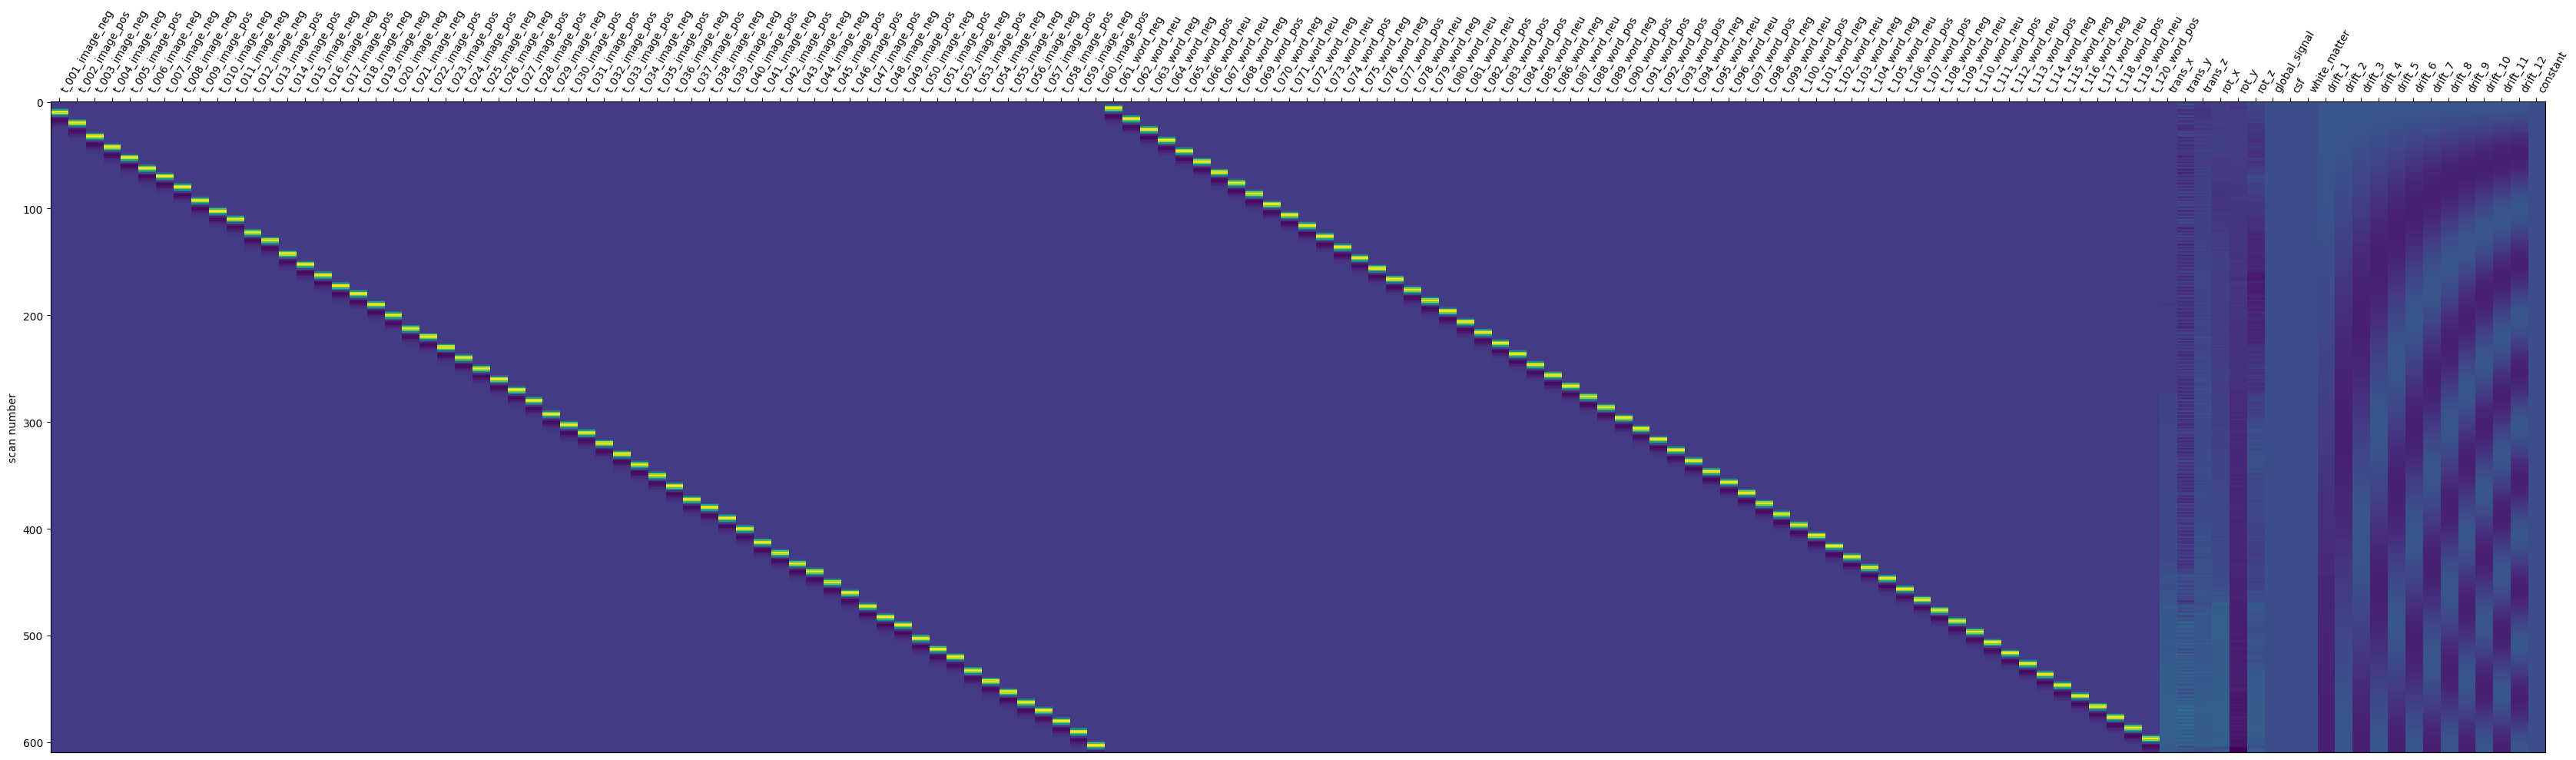

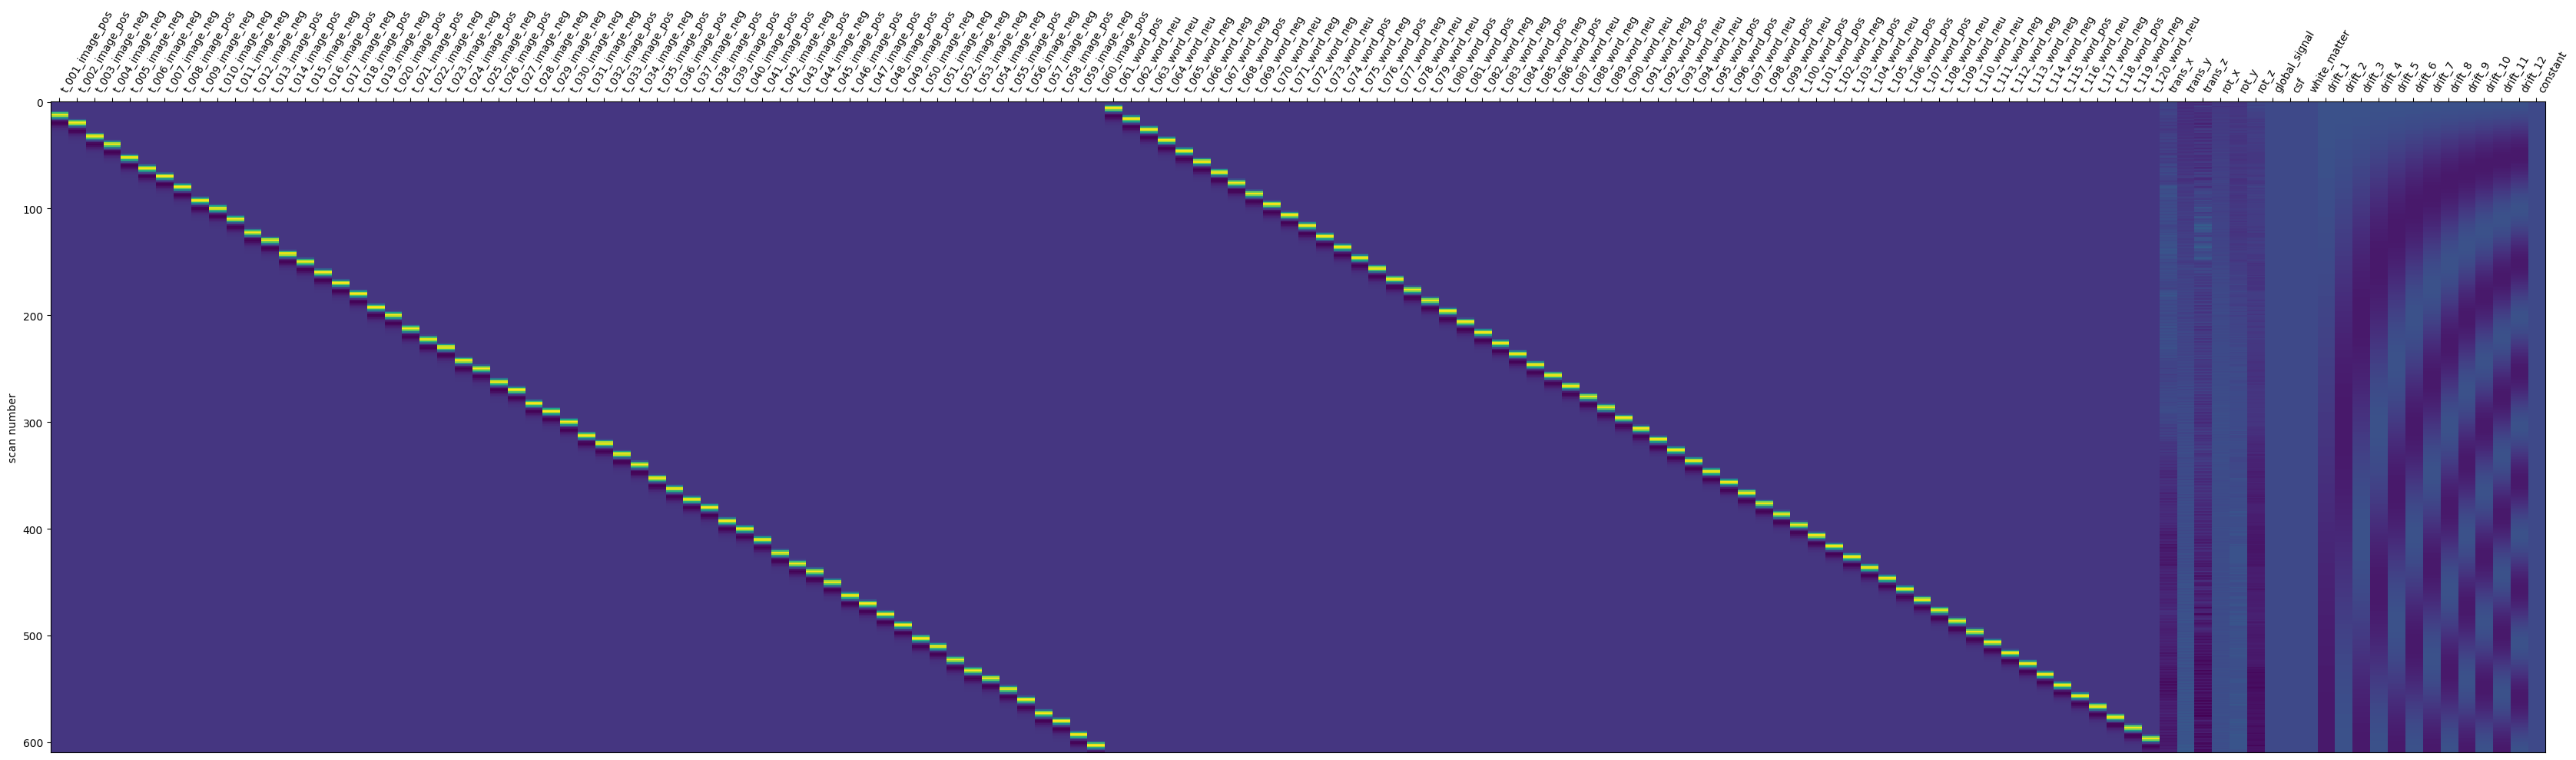

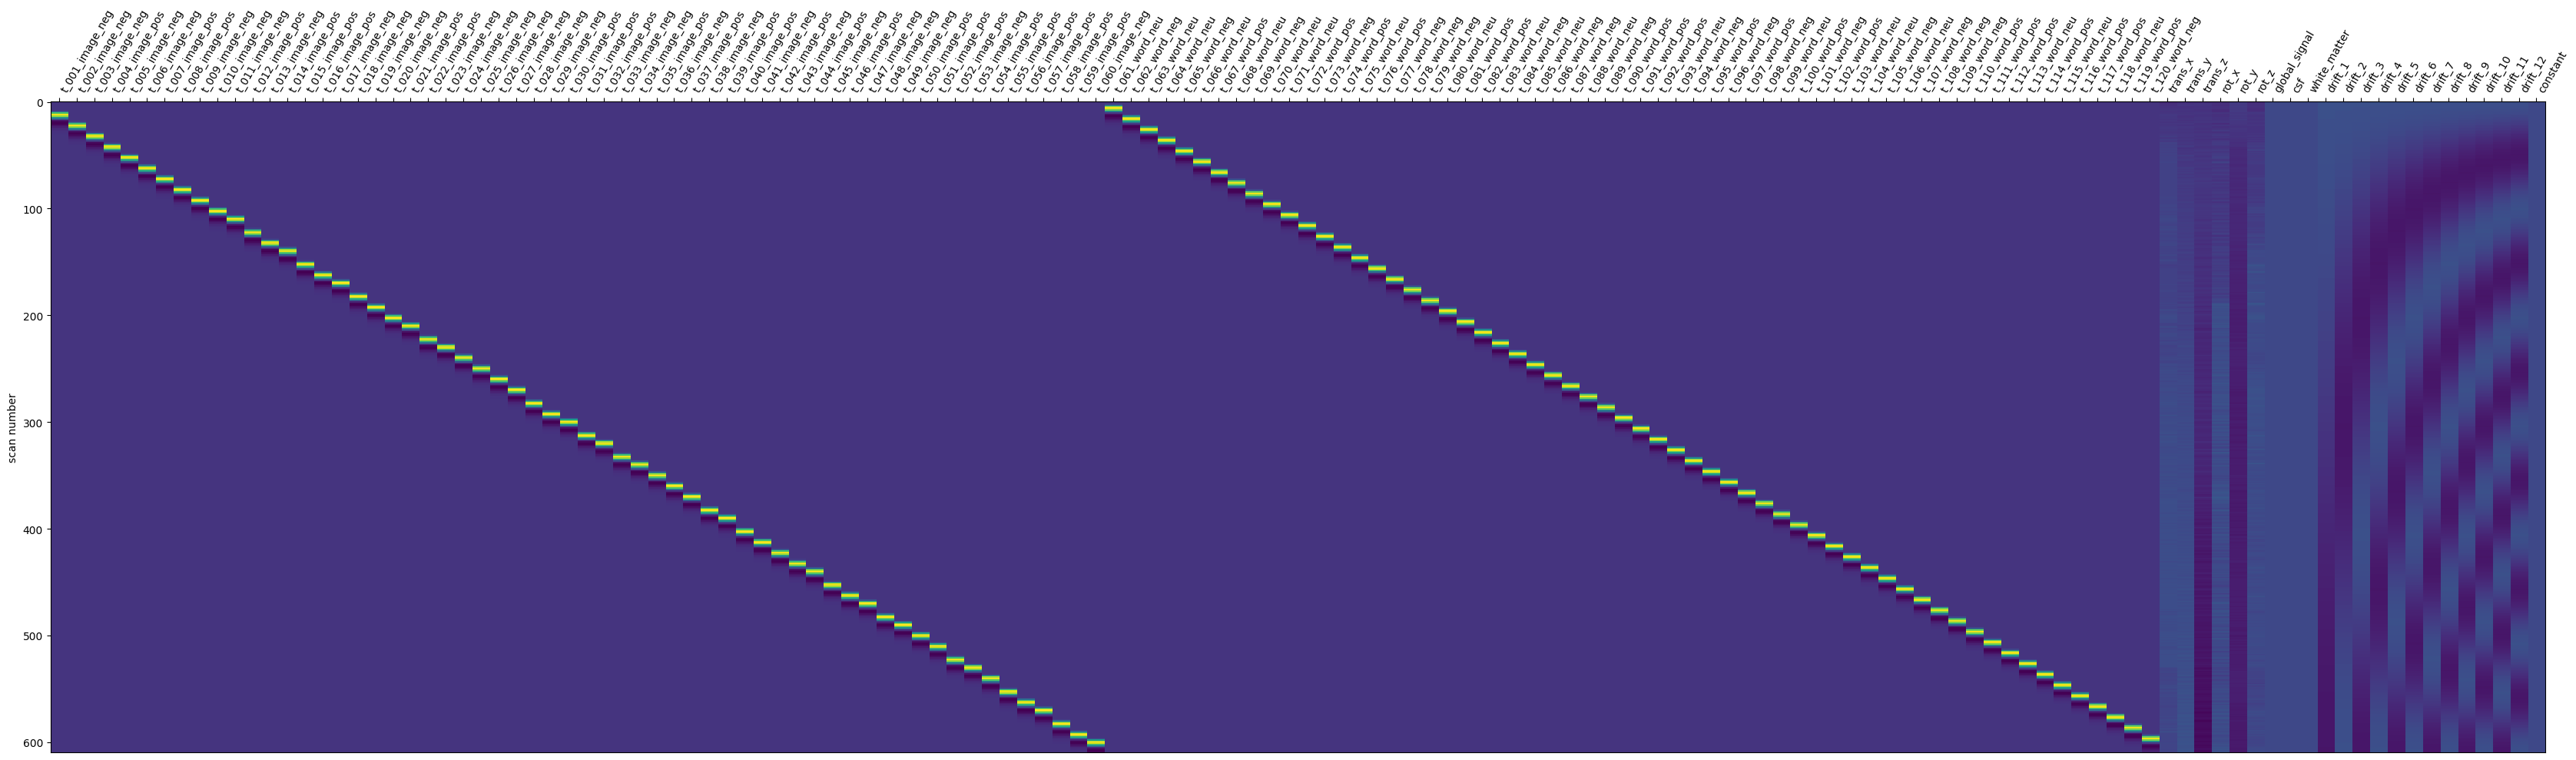

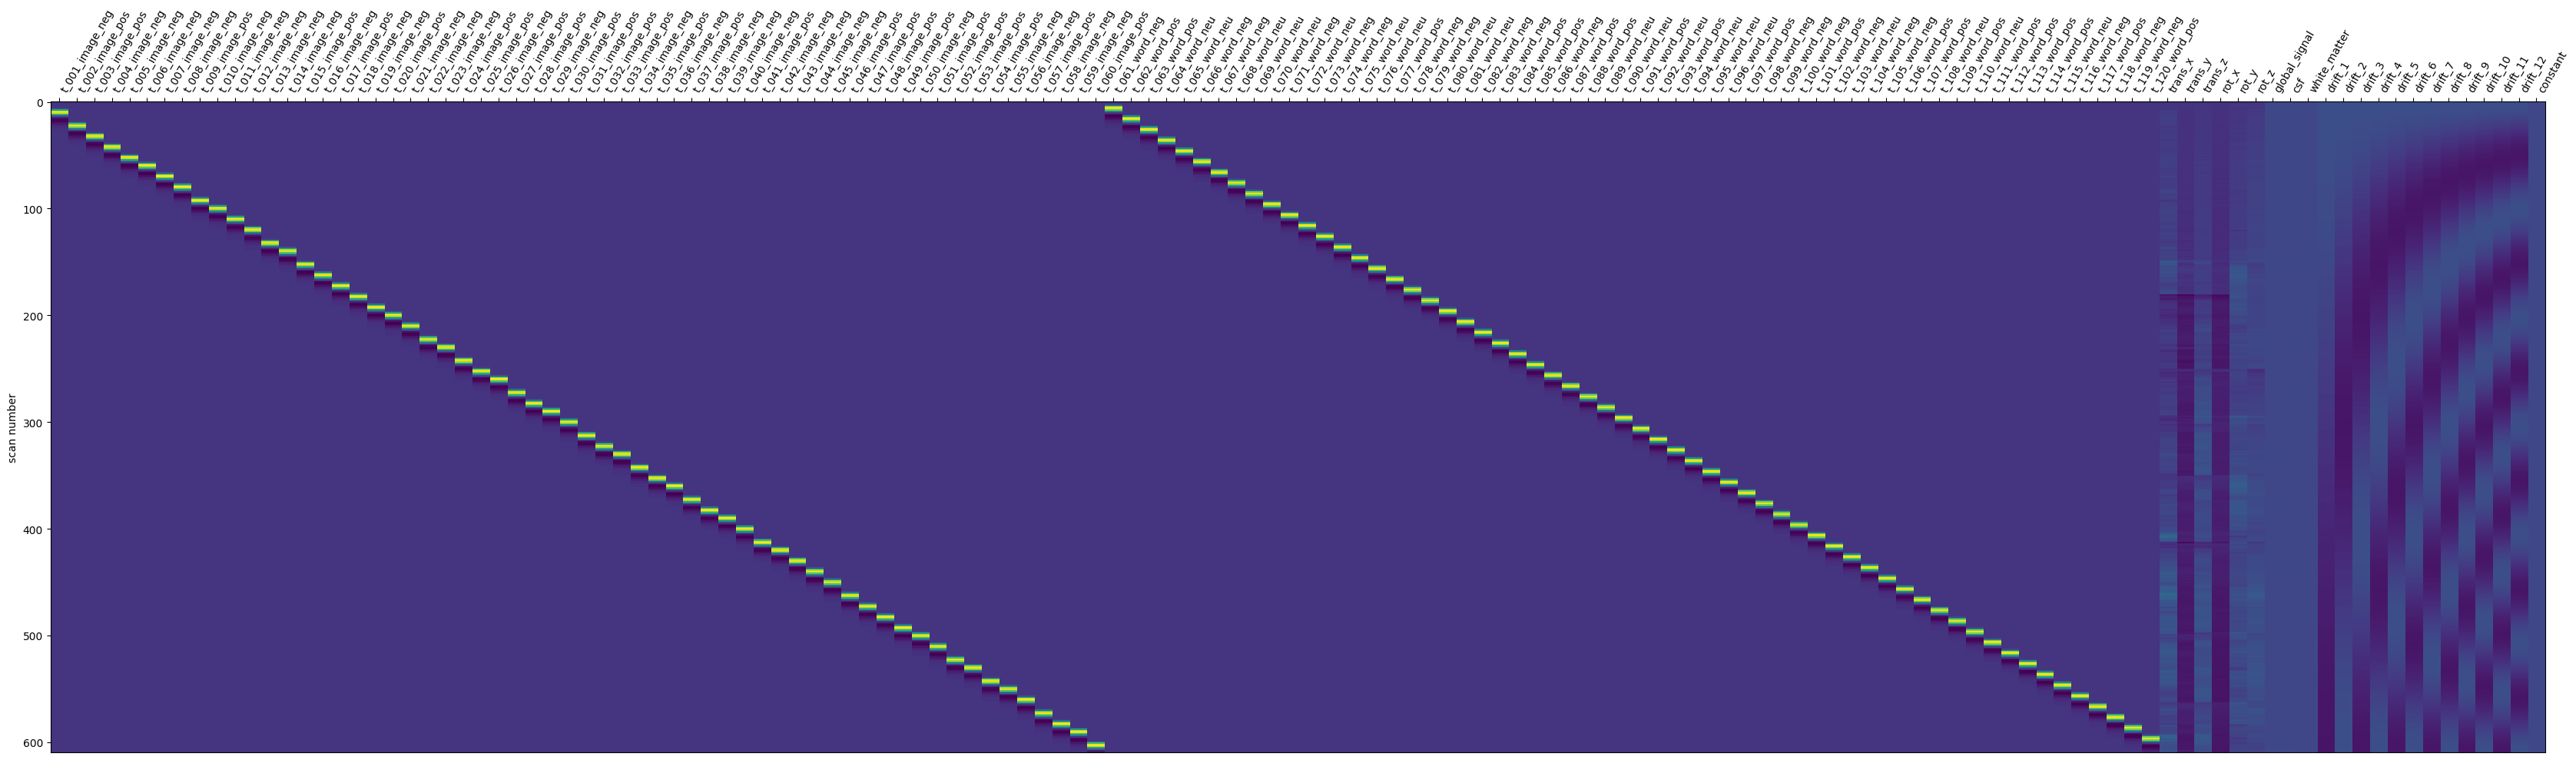

In [4]:
from nilearn.plotting import plot_design_matrix

for ii in range(len(models_events1)):
    plot_design_matrix(lsa_dm[ii][ii]);

In [ ]:
##Looking at the correlation (don't know what we are going to use this for)

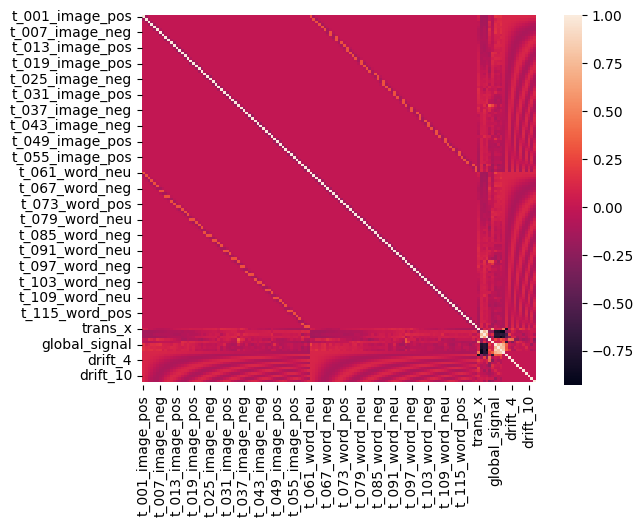

In [5]:
import seaborn as sns

dm_corr=lsa_dm[1][0].corr()
p1 = sns.heatmap(dm_corr)

In [ ]:
#fitting the model for all participants

In [2]:
from nilearn.glm.first_level import FirstLevelModel

N_par=len(models_events1) # Number of participants
models_trials_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    #models_trials_all[i]= np.empty((len(models_events[i]), 0)).tolist()
    for ii in range(len(models_events1[i])):
    
        # Get data and model info for 1st participant, 1st session
        imgs_trials=models_run_imgs1[i][ii]
        models_trials_all[i].append (FirstLevelModel())
        #Fit the model
        text = "Fitting GLM for participant %d, session %d" % (i+1, ii+1)
        print(text)
        models_trials_all[i][ii].fit(imgs_trials,design_matrices=lsa_dm[i][ii])


import pickle

# Saving the objects:
f = open('485667/BIDS/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
pickle.dump([models_trials_all, lsa_dm], f)
f.close()

NameError: name 'np' is not defined

In [7]:
print(models_events1)

[[          onset  duration trial_type
0      4.696655  0.682401  image_pos
1     17.294483  0.685205  image_neg
2     27.295871  0.684265  image_neg
3     34.694644  0.685783  image_pos
4     47.294868  0.686134  image_neg
..          ...       ...        ...
115  551.006472  0.697514   word_neg
116  561.007021  0.697386   word_neg
117  571.008851  0.696046   word_neg
118  581.008091  0.697220   word_neu
119  591.008205  0.697586   word_neu

[120 rows x 3 columns],           onset  duration trial_type
0      4.700958  0.682003  image_neg
1     17.298008  0.685581  image_pos
2     24.699738  0.684194  image_pos
3     37.298487  0.686003  image_pos
4     47.299493  0.685435  image_neg
..          ...       ...        ...
115  551.010789  0.697447   word_neg
116  561.012442  0.696177   word_neg
117  571.012266  0.696875   word_pos
118  581.012239  0.697328   word_neg
119  591.012752  0.697254   word_neu

[120 rows x 3 columns],           onset  duration trial_type
0      7.297832  0.6815

In [ ]:
#loading in some the wordface models (not z-map)


In [17]:
import pickle

f = open('/work/MariaMujemulaOlsen#8692/WordFace_first_level_models_all_trials_all_par.pkl', 'rb')
models_trials_all, lsa_dm = pickle.load(f)

f.close()

In [ ]:
## Making z-map contrasts from the fitted model to use in later analyses

In [18]:
#print(models_events1[2][2].shape)

(120, 3)


In [26]:
## trying to run z_map just for one participant

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))


N_par = len(models_events1)  # Number of participants
z_maps_all = np.empty((N_par, 0)).tolist()
conditions_label_all = np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events1[i])):
        text = "Making contrasts for participant %d, session %d" % (i+1, ii+1)
        print(text)
        N = models_events1[i][ii].shape[0]
        # Make an identity matrix with N = number of trials
        contrasts = np.eye(N)
        
        # Find the difference between columns in the design matrix and the number of trials
        dif = lsa_dm[i][ii].shape[1] - contrasts.shape[1]
        
        # Pad with zeros
        contrasts = np.pad(contrasts, ((0, 0), (0, dif)), 'constant')
        print(contrasts.shape)
        
        for iii in range(N):
            # Add a z-contrast image from each trial
            z_maps_all[i].append(models_trials_all[i][ii].compute_contrast(contrasts[iii,], output_type='z_score'))
            # Make a variable with condition labels for use in later classification
            conditions_label_all[i].append(models_events1[i][ii]['trial_type'][iii])
        
    print("Done with participant")

    # Save the data for each participant after all sessions
    f = open('485667/BIDS/first_level_z_maps_all_trials_%d_par.pkl' % i, 'wb')
    pickle.dump([conditions_label_all[i], z_maps_all[i]], f)
    f.close()
    


            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 16:21:06
Making contrasts for participant 1, session 1
(120, 142)
Making contrasts for participant 1, session 2
(120, 142)
Making contrasts for participant 1, session 3
(120, 142)
Making contrasts for participant 1, session 4
(120, 142)
Making contrasts for participant 1, session 5
(120, 142)
Making contrasts for participant 1, session 6
(120, 142)
Done with participant
Making contrasts for participant 2, session 1
(120, 142)
Making contrasts for participant 2, session 2
(120, 142)
Making contrasts for participant 2, session 3
(120, 142)
Making contrasts for participant 2, session 4
(120, 142)
Making contrasts for participant 2, session 5
(120, 142)
Making contrasts for participant 2, session 6
(120, 142)
Done with participant
Making contrasts for participant 3, session 1
(120, 142)
Making contrasts for participant 3, session 2
(120, 142)
Making contrasts for participant 3, session 3
(120, 142)
Making contrasts for participant 3, session 4
(120, 142)
Making contrasts for

In [20]:
import pickle

#Save the first level model for one participant

# Saving the objects:
f = open('485667/BIDS/first_level_z_maps_all_trials_one_par.pkl', 'wb')
pickle.dump([conditions_label_all, z_maps_all], f)
f.close()

In [ ]:
N_par=len(models_events1) # Number of participants
z_maps_all= np.empty((N_par, 0)).tolist()
conditions_label_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events1[i])):
        text = "Making contrasts for participant %d , session %d" % (i+1, ii+1)
        print(text)
        N=models_events1[i][ii].shape[0]
        #Make an identity matrix with N= number of trials
        contrasts=np.eye(N)
        
        #Find difference between columns in design matrix and number of trials
        dif=lsa_dm[i][ii].shape[1]-contrasts.shape[1]
        
        #Pad with zeros
        contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
        print(contrasts.shape)
        for iii in range(N):
            #Add a z-contrast image from each trial
            z_maps_all[i].append(models_trials_all[i][ii].compute_contrast(contrasts[iii,], output_type='z_score'))
            # Make a variable with condition labels for use in later classification
            conditions_label_all[i].append(models_events1[i][ii]['trial_type'][iii])

import pickle

#Save the first level models

# Saving the objects:
f = open('485667/BIDS/first_level_z_maps_all_trials_all_par.pkl', 'wb')
pickle.dump([conditions_label_all, z_maps_all], f)
f.close()

Making contrasts for participant 1 , session 1
(120, 142)
Making contrasts for participant 1 , session 2
(120, 142)
Making contrasts for participant 1 , session 3
(120, 142)
Making contrasts for participant 1 , session 4
(120, 142)
Making contrasts for participant 1 , session 5
(120, 142)
Making contrasts for participant 1 , session 6
(120, 142)
Making contrasts for participant 2 , session 1
(120, 142)
Making contrasts for participant 2 , session 2
(120, 142)
Making contrasts for participant 2 , session 3
(120, 142)
Making contrasts for participant 2 , session 4
(120, 142)
Making contrasts for participant 2 , session 5
(120, 142)
Making contrasts for participant 2 , session 6
(120, 142)
Making contrasts for participant 3 , session 1
(120, 142)
Making contrasts for participant 3 , session 2
(120, 142)
Making contrasts for participant 3 , session 3
(120, 142)
Making contrasts for participant 3 , session 4
(120, 142)
Making contrasts for participant 3 , session 5
(120, 142)
Making contras

In [12]:
os.getcwd()

'/work/MariaMujemulaOlsen#8692'

In [ ]:
import pickle

f = open('485667/BIDS/sparkmonitor_kernelextension.log', 'r')


In [ ]:
## Saving models and z_maps

In [22]:
# Getting back the objects:
import pickle

f = open('485667/BIDS/first_level_z_maps_all_trials_one_par.pkl', 'rb')
conditions_label_all, z_maps_all = pickle.load(f)

f.close()

In [ ]:
## Reshape data for classification

In [ ]:
import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold

N_par=len(models_events1) # Number of participants
z_maps_img_all= np.empty((N_par, 0)).tolist()
z_maps_conc= np.empty((N_par, 0)).tolist()
conditions= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    n_trials=len(conditions_label_all[i])
    text = "Reshaping participant %d\n" % (i+1)
    print(text)


    # Reshaping data------------------------------
    from nilearn.image import index_img, concat_imgs
    idx_neg=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_neg']
    idx_pos=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_pos']

    #Concatenate trials
    idx=np.concatenate((idx_neg, idx_pos))

    conditions[i]=np.array(conditions_label_all[i])[idx]
    z_maps_conc[i]=concat_imgs(z_maps_all[i])
    print(z_maps_conc[i].shape)
    z_maps_img_all[i] = index_img(z_maps_conc[i], idx)

    print(z_maps_img_all[i].shape)

In [ ]:
## create training and testing vars on the basis of class labels

In [ ]:
N_par=len(models_events1) # Number of participants
idx1= np.empty((N_par, 0)).tolist()
idx2= np.empty((N_par, 0)).tolist()
conditions1= np.empty((N_par, 0)).tolist()
conditions2= np.empty((N_par, 0)).tolist()
fmri_img1= np.empty((N_par, 0)).tolist()
fmri_img2= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Creating trian/test data for participant %d\n" % (i+1)
    print(text)
    idx2[i]=np.arange(conditions[i].shape[0])
    # create training and testing vars on the basis of class labels
    idx1[i],idx2[i], conditions1[i],  conditions2[i] = train_test_split(idx2[i],conditions[i], test_size=0.2)
    
    # Reshaping data------------------------------
    from nilearn.image import index_img
    fmri_img1[i] = index_img(z_maps_img_all[i], idx1[i])
    fmri_img2[i] = index_img(z_maps_img_all[i], idx2[i])

In [ ]:
## Prepare a searchlight analysis on the first split 
###look closer at this codechunk!!!!

In [ ]:
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img

#Whole brain mask. Using one from a one participant for all
mask_wb_filename='485667/BIDS/derivatives/sub-0100/anat/sub-0100_acq-T13D_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

#######################do we want all slices? how to not delete slices so that we only have in range 30-160 but have ALL slices?
# .astype() makes a copy.
process_mask = mask_img.get_fdata().astype(np.int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[..., :30] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[..., 160:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the mask
plot_img(process_mask_img, title="Mask", display_mode="z",cut_coords=[-30,-20,-10,0,10,20,30,40,50],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)

In [ ]:
## Run the searchlight analysis

In [ ]:
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from sklearn import naive_bayes, model_selection #import GaussianNB
from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC


N_par=len(models_events1) # Number of participants
searchlight_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Conducting searchlight on participant %d" % (i+1)
    print(text)
    # The radius is the one of the Searchlight sphere that will scan the volume
    searchlight_all[i] = SearchLight(
        mask_img,
        estimator=LinearSVC(penalty='l2'),
        process_mask_img=process_mask_img,
        radius=5, n_jobs=-1,
        verbose=10, cv=10)
    searchlight[i].fit(fmri_img1[i], conditions1[i])

    import pickle

#Save the first level models

# Saving the objects:
f = open('485667/BIDS/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all], f)
f.close()

In [ ]:
## Plot the outcome of the searchlight analysis

In [ ]:
from nilearn.plotting import plot_glass_brain

from nilearn import plotting
import matplotlib.pyplot as plt


N_par=len(models_events1) # Number of participants
searchlight_img= np.empty((N_par, 0)).tolist()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 
for i in range(N_par):
    #Create an image of the searchlight scores
    searchlight_img[i] = new_img_like(mask_wb_filename, searchlight_all[i].scores_)
    plotting.plot_glass_brain(searchlight_img[i], cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub-' + i+1),
                              axes=axes[int(m_idx / 5), int(m_idx % 5)],
                              plot_abs=False, display_mode='x')

   
fig.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

# Saving the objects:
f = open('485667/BIDS/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img], f)
f.close()


In [ ]:
### Find the 500 most predictive voxels 

In [ ]:
N_par=len(models_events1) # Number of participants
cut= np.empty((N_par, 0)).tolist()
perc= np.empty((N_par, 0)).tolist()
process_mask2_img[i]= np.empty((N_par, 0)).tolist()


#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

for i in range(N_par):
    #Find the percentile that makes the cutoff for the 500 best voxels
    perc[i]=100*(1-500.0/searchlight_all.scores_.size)
    #Find the cutoff
    cut[i]=np.percentile(searchlight_all[i].scores_,perc)
    #Print cutoff
    text='Cutoff for participant %d: %d ' % (i+1, cut[i])
    print(text)

    # .astype() makes a copy.
    process_mask2 = mask_img2.get_fdata().astype(np.int)
    process_mask2[searchlight_all[i].scores_<=cut[i]] = 0
    process_mask2_img[i] = new_img_like(mask_img2, process_mask2)

    

# Saving the objects:
f = open('485667/BIDS/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img, cut, perc, process_mask2_img], f)
f.close()

In [ ]:
### Perform a permutation test

In [ ]:
from sklearn.model_selection import permutation_test_score

for i in range(N_par):
    
    masker = NiftiMasker(mask_img=process_mask2_img[i], standardize=False)
    # We use masker to retrieve a 2D array ready
    # for machine learning with scikit-learn
    fmri_masked = masker.fit_transform(fmri_img2[i])
    #Print size of matrix (images x voxels)
    
    score[i], permutation_scores[i], pvalue[i]= permutation_test_score(
        LinearSVC(penalty='l2'), fmri_masked[i], conditions2[i], cv=10, n_permutations=1000, 
        n_jobs=-1, random_state=0, verbose=0, scoring=None)
    print("Classification Accuracy for participant %d: %s (pvalue : %s)" % (i,score, pvalue))
 
# Saving the objects:
f = open('/work/MariaMujemulaOlsen#8692/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img, cut, perc, process_mask2_img, score,permutation_score,pvalue], f)
f.close()
